In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the data
data = pd.read_csv('data/msci.csv', parse_dates=True, index_col=0)
data.head()

EM    EUROPE       FM     JAPAN SINGAPORE       USA   CHINA  \
Date                                                                            
2011-01-31  3,780.92  1,512.87  599.883  2,498.83  4,201.40  1,228.57  65.966   
2011-02-28  3,749.16  1,559.61  558.921  2,611.91  3,988.39  1,267.03  64.774   
2011-03-31  3,965.75  1,542.53  560.606  2,348.94  4,181.01  1,266.63  68.218   
2011-04-29  4,091.26  1,657.04  575.762  2,357.33  4,384.94  1,303.97  69.072   
2011-05-31  3,945.57  1,588.34  550.553  2,318.31  4,269.12  1,287.01  68.890   

                  AGG        HYG        EMB  
Date                                         
2011-01-31  81.466309  52.276836  66.213280  
2011-02-28  81.308517  52.307362  67.242981  
2011-03-31  82.559906  53.146255  68.392433  
2011-04-29  83.584259  53.218540  69.389603  
2011-05-31  83.216759  52.917309  69.818535

In [3]:
# looking through data; notice the commas in the thousands
data.tail()

EM    EUROPE       FM     JAPAN SINGAPORE       USA  \
Date                                                                    
2020-09-30  3,070.19  1,596.25  515.548  3,349.16  2,973.38  3,254.94   
2020-10-30  3,058.32  1,504.84  520.309  3,295.15  2,886.53  3,166.93   
2020-11-30  3,490.34  1,758.87  541.248  3,706.05  3,419.56  3,527.53   
2020-12-31  3,844.94  1,840.22  571.633  3,854.97  3,510.71  3,667.92   
2021-01-29  3,852.86  1,812.80  573.316  3,816.20  3,542.21  3,630.30   

              CHINA         AGG        HYG         EMB  
Date                                                    
2020-09-30   97.533  116.290421  82.192993  108.165718  
2020-10-30  102.674  117.702339  84.945351  112.696396  
2020-11-30  105.505  117.666496  86.279022  114.746841  
2020-12-31  108.406  117.117996  86.652000  113.487999  
2021-01-29  116.387  116.518982  87.199982  113.856827

In [4]:
# rechecking the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2011-01-31 to 2021-01-29
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EM         121 non-null    object 
 1   EUROPE     121 non-null    object 
 2   FM         121 non-null    float64
 3   JAPAN      121 non-null    object 
 4   SINGAPORE  121 non-null    object 
 5   USA        121 non-null    object 
 6   CHINA      121 non-null    float64
 7   AGG        121 non-null    float64
 8   HYG        121 non-null    float64
 9   EMB        121 non-null    float64
dtypes: float64(5), object(5)
memory usage: 10.4+ KB


In [5]:
# filter out the strings to replace commas which prevents from changing to float64
sources = data.select_dtypes(include='object')
sources = sources.apply(lambda x: x.str.replace(',',''))

In [6]:
# changing the Dtype
sources = sources.astype('float64')
sources.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2011-01-31 to 2021-01-29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EM         121 non-null    float64
 1   EUROPE     121 non-null    float64
 2   JAPAN      121 non-null    float64
 3   SINGAPORE  121 non-null    float64
 4   USA        121 non-null    float64
dtypes: float64(5)
memory usage: 5.7 KB


In [7]:
sources

EM   EUROPE    JAPAN  SINGAPORE      USA
Date                                                     
2011-01-31  3780.92  1512.87  2498.83    4201.40  1228.57
2011-02-28  3749.16  1559.61  2611.91    3988.39  1267.03
2011-03-31  3965.75  1542.53  2348.94    4181.01  1266.63
2011-04-29  4091.26  1657.04  2357.33    4384.94  1303.97
2011-05-31  3945.57  1588.34  2318.31    4269.12  1287.01
...             ...      ...      ...        ...      ...
2020-09-30  3070.19  1596.25  3349.16    2973.38  3254.94
2020-10-30  3058.32  1504.84  3295.15    2886.53  3166.93
2020-11-30  3490.34  1758.87  3706.05    3419.56  3527.53
2020-12-31  3844.94  1840.22  3854.97    3510.71  3667.92
2021-01-29  3852.86  1812.80  3816.20    3542.21  3630.30

[121 rows x 5 columns]

In [8]:
# filter out the float64 type
sources2 = data.select_dtypes(include='float64')
sources2

FM    CHINA         AGG        HYG         EMB
Date                                                           
2011-01-31  599.883   65.966   81.466309  52.276836   66.213280
2011-02-28  558.921   64.774   81.308517  52.307362   67.242981
2011-03-31  560.606   68.218   82.559906  53.146255   68.392433
2011-04-29  575.762   69.072   83.584259  53.218540   69.389603
2011-05-31  550.553   68.890   83.216759  52.917309   69.818535
...             ...      ...         ...        ...         ...
2020-09-30  515.548   97.533  116.290421  82.192993  108.165718
2020-10-30  520.309  102.674  117.702339  84.945351  112.696396
2020-11-30  541.248  105.505  117.666496  86.279022  114.746841
2020-12-31  571.633  108.406  117.117996  86.652000  113.487999
2021-01-29  573.316  116.387  116.518982  87.199982  113.856827

[121 rows x 5 columns]

In [9]:
data = sources.merge(sources2, left_on='Date', right_on='Date')
data

EM   EUROPE    JAPAN  SINGAPORE      USA       FM    CHINA  \
Date                                                                          
2011-01-31  3780.92  1512.87  2498.83    4201.40  1228.57  599.883   65.966   
2011-02-28  3749.16  1559.61  2611.91    3988.39  1267.03  558.921   64.774   
2011-03-31  3965.75  1542.53  2348.94    4181.01  1266.63  560.606   68.218   
2011-04-29  4091.26  1657.04  2357.33    4384.94  1303.97  575.762   69.072   
2011-05-31  3945.57  1588.34  2318.31    4269.12  1287.01  550.553   68.890   
...             ...      ...      ...        ...      ...      ...      ...   
2020-09-30  3070.19  1596.25  3349.16    2973.38  3254.94  515.548   97.533   
2020-10-30  3058.32  1504.84  3295.15    2886.53  3166.93  520.309  102.674   
2020-11-30  3490.34  1758.87  3706.05    3419.56  3527.53  541.248  105.505   
2020-12-31  3844.94  1840.22  3854.97    3510.71  3667.92  571.633  108.406   
2021-01-29  3852.86  1812.80  3816.20    3542.21  3630.30  573.316  116.387   

                   AGG        HYG         EMB  
Date                                           
2011-01-31   81.466309  52.276836   66.213280  
2011-02-28   81.308517  52.307362   67.242981  
2011-03-31   82.559906  53.146255   68.392433  
2011-04-29   83.584259  53.218540   69.389603  
2011-05-31   83.216759  52.917309   69.818535  
...                ...        ...         ...  
2020-09-30  116.290421  82.192993  108.165718  
2020-10-30  117.702339  84.945351  112.696396  
2020-11-30  117.666496  86.279022  114.746841  
2020-12-31  117.117996  86.652000  113.487999  
2021-01-29  116.518982  87.199982  113.856827  

[121 rows x 10 columns]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2011-01-31 to 2021-01-29
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EM         121 non-null    float64
 1   EUROPE     121 non-null    float64
 2   JAPAN      121 non-null    float64
 3   SINGAPORE  121 non-null    float64
 4   USA        121 non-null    float64
 5   FM         121 non-null    float64
 6   CHINA      121 non-null    float64
 7   AGG        121 non-null    float64
 8   HYG        121 non-null    float64
 9   EMB        121 non-null    float64
dtypes: float64(10)
memory usage: 10.4 KB


In [11]:
# calculate annual returns and annual covariance of the stocks
returns_monthly = data.pct_change().dropna()
returns_annual  = returns_monthly.mean() * 12
cov_annual = returns_monthly.cov() * 12

In [12]:
returns_monthly

EM    EUROPE     JAPAN  SINGAPORE       USA        FM  \
Date                                                                      
2011-02-28 -0.008400  0.030895  0.045253  -0.050700  0.031305 -0.068283   
2011-03-31  0.057770 -0.010951 -0.100681   0.048295 -0.000316  0.003015   
2011-04-29  0.031648  0.074235  0.003572   0.048775  0.029480  0.027035   
2011-05-31 -0.035610 -0.041459 -0.016553  -0.026413 -0.013006 -0.043784   
2011-06-30 -0.012880 -0.021223  0.014174  -0.015825 -0.018555 -0.010508   
...              ...       ...       ...        ...       ...       ...   
2020-09-30 -0.009709 -0.033911  0.002544  -0.030904 -0.038505  0.006383   
2020-10-30 -0.003866 -0.057265 -0.016126  -0.029209 -0.027039  0.009235   
2020-11-30  0.141261  0.168809  0.124698   0.184661  0.113864  0.040243   
2020-12-31  0.101595  0.046251  0.040183   0.026655  0.039798  0.056139   
2021-01-29  0.002060 -0.014900 -0.010057   0.008973 -0.010256  0.002944   

               CHINA       AGG       HYG       EMB  
Date                                                
2011-02-28 -0.018070 -0.001937  0.000584  0.015551  
2011-03-31  0.053169  0.015391  0.016038  0.017094  
2011-04-29  0.012519  0.012407  0.001360  0.014580  
2011-05-31 -0.002635 -0.004397 -0.005660  0.006182  
2011-06-30 -0.045144  0.016930  0.003299  0.019813  
...              ...       ...       ...       ...  
2020-09-30 -0.028585 -0.005646  0.003787 -0.004928  
2020-10-30  0.052710  0.012141  0.033487  0.041886  
2020-11-30  0.027573 -0.000305  0.015700  0.018194  
2020-12-31  0.027496 -0.004661  0.004323 -0.010971  
2021-01-29  0.073621 -0.005115  0.006324  0.003250  

[120 rows x 10 columns]

In [13]:
returns_annual

EM           0.019175
EUROPE       0.032044
JAPAN        0.052034
SINGAPORE    0.002192
USA          0.118216
FM           0.005527
CHINA        0.078497
AGG          0.036357
HYG          0.054029
EMB          0.058333
dtype: float64

In [14]:
cov_annual

EM    EUROPE     JAPAN  SINGAPORE       USA        FM  \
EM         0.034337  0.025259  0.015764   0.031361  0.019202  0.017139   
EUROPE     0.025259  0.027943  0.016743   0.025137  0.019666  0.015384   
JAPAN      0.015764  0.016743  0.019333   0.016983  0.013385  0.009945   
SINGAPORE  0.031361  0.025137  0.016983   0.038350  0.019384  0.016627   
USA        0.019202  0.019666  0.013385   0.019384  0.018900  0.011552   
FM         0.017139  0.015384  0.009945   0.016627  0.011552  0.019216   
CHINA      0.028331  0.022065  0.014420   0.029100  0.017506  0.013737   
AGG       -0.000905 -0.000941 -0.000930  -0.000294 -0.000710 -0.000444   
HYG       -0.000636 -0.001303 -0.000620  -0.001058 -0.001280 -0.000560   
EMB        0.000562  0.000023  0.000184   0.000560  0.000159 -0.000078   

              CHINA       AGG       HYG       EMB  
EM         0.028331 -0.000905 -0.000636  0.000562  
EUROPE     0.022065 -0.000941 -0.001303  0.000023  
JAPAN      0.014420 -0.000930 -0.000620  0.000184  
SINGAPORE  0.029100 -0.000294 -0.001058  0.000560  
USA        0.017506 -0.000710 -0.001280  0.000159  
FM         0.013737 -0.000444 -0.000560 -0.000078  
CHINA      0.043137 -0.000958 -0.002377 -0.001778  
AGG       -0.000958  0.001047  0.000583  0.001392  
HYG       -0.002377  0.000583  0.005531  0.005234  
EMB       -0.001778  0.001392  0.005234  0.007842

In [15]:
correlation = returns_monthly.corr()

<AxesSubplot:>

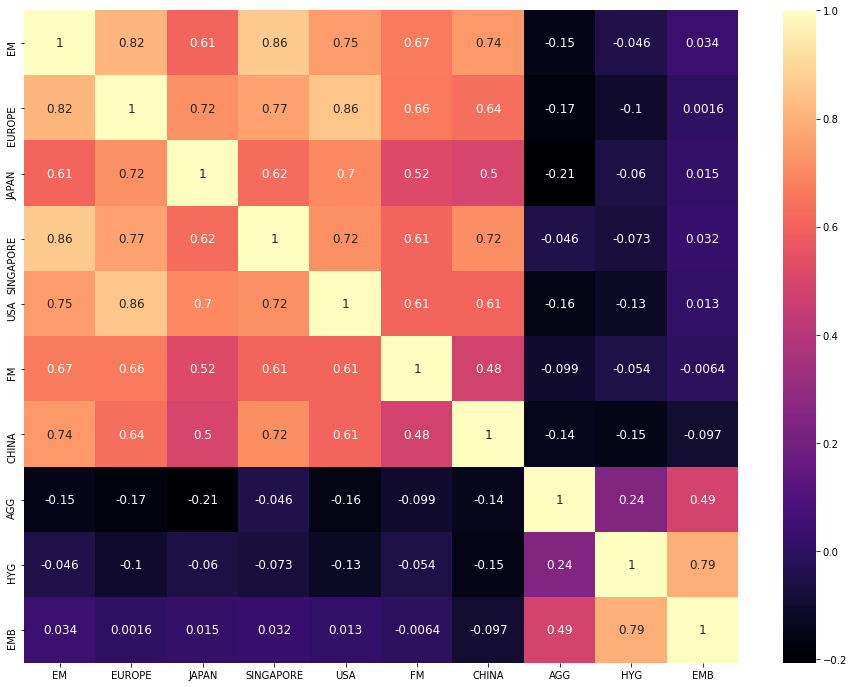

In [16]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(correlation, annot=True, annot_kws={"size": 12}, cmap='magma', ax=ax)

In [17]:
n_portfolios = 100000
n_assets = len(data.columns)

In [18]:
countries = list(data.columns.values)
countries

['EM',
 'EUROPE',
 'JAPAN',
 'SINGAPORE',
 'USA',
 'FM',
 'CHINA',
 'AGG',
 'HYG',
 'EMB']

## 2011 Onwards

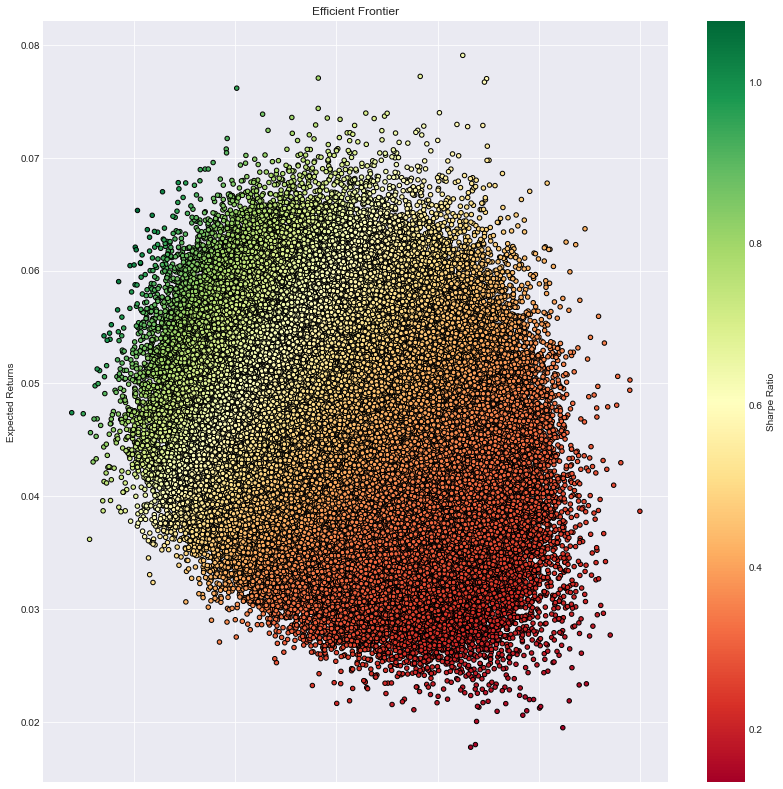

In [19]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(countries)
num_portfolios = 500000

#set random seed for reproduction's sake
np.random.seed(42)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(countries):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in countries]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(14, 14), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

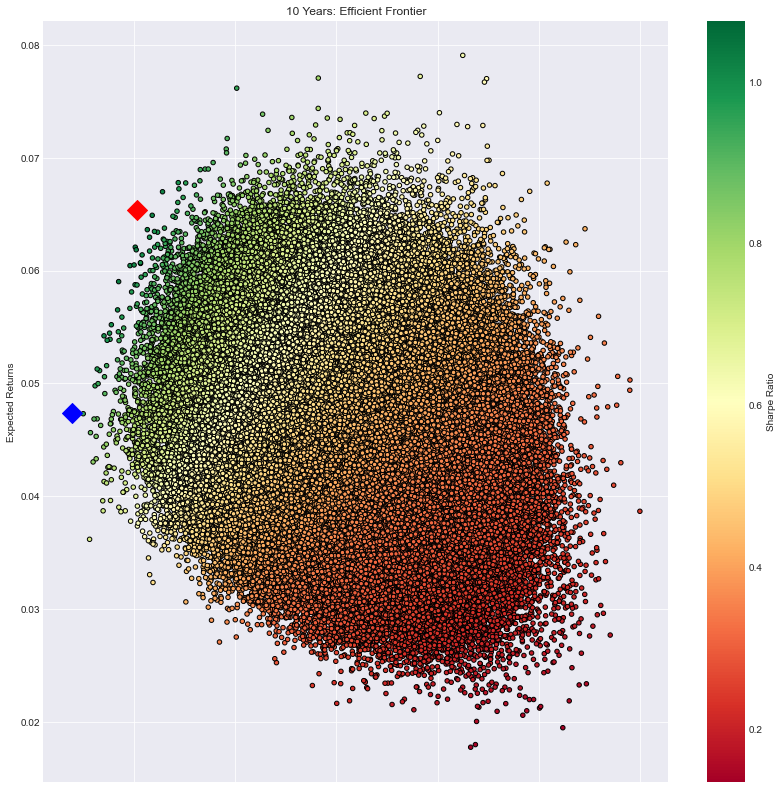

In [20]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(14, 14), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('10 Years: Efficient Frontier')
plt.show()

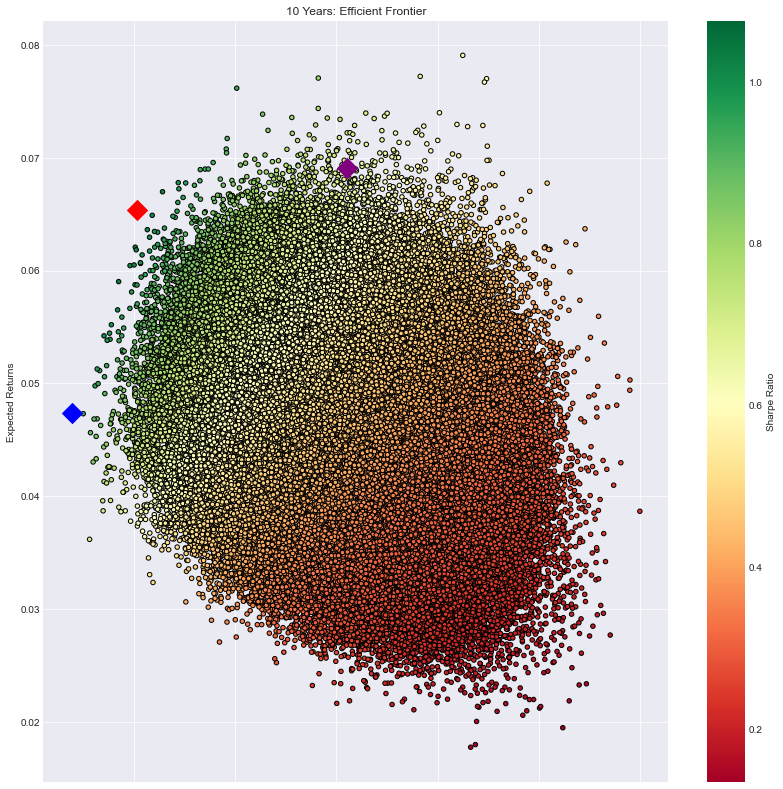

In [21]:
our_weights = np.array([0.15, 0.03, 0.02, 0.05, 0.35, 0.0, 0.1, 0.1, 0.1, 0.1])
np.sum(our_weights)

returns = np.dot(our_weights, returns_annual)
volatility = np.sqrt(np.dot(our_weights.T, np.dot(cov_annual, our_weights)))
sharpe = returns / volatility

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(14, 14), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.scatter(x=volatility, y=returns, c='purple', marker='D', s=200 )
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('10 Years: Efficient Frontier')
plt.show()

In [22]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)

                    247408
Returns           0.047409
Volatility        0.047778
Sharpe Ratio      0.992264
EM Weight         0.004278
EUROPE Weight     0.012610
JAPAN Weight      0.090754
SINGAPORE Weight  0.014862
USA Weight        0.082514
FM Weight         0.113109
CHINA Weight      0.005474
AGG Weight        0.315709
HYG Weight        0.269547
EMB Weight        0.091144
                    302573
Returns           0.065319
Volatility        0.060750
Sharpe Ratio      1.075215
EM Weight         0.005705
EUROPE Weight     0.001114
JAPAN Weight      0.076686
SINGAPORE Weight  0.006362
USA Weight        0.182989
FM Weight         0.001921
CHINA Weight      0.108950
AGG Weight        0.183596
HYG Weight        0.218300
EMB Weight        0.214377


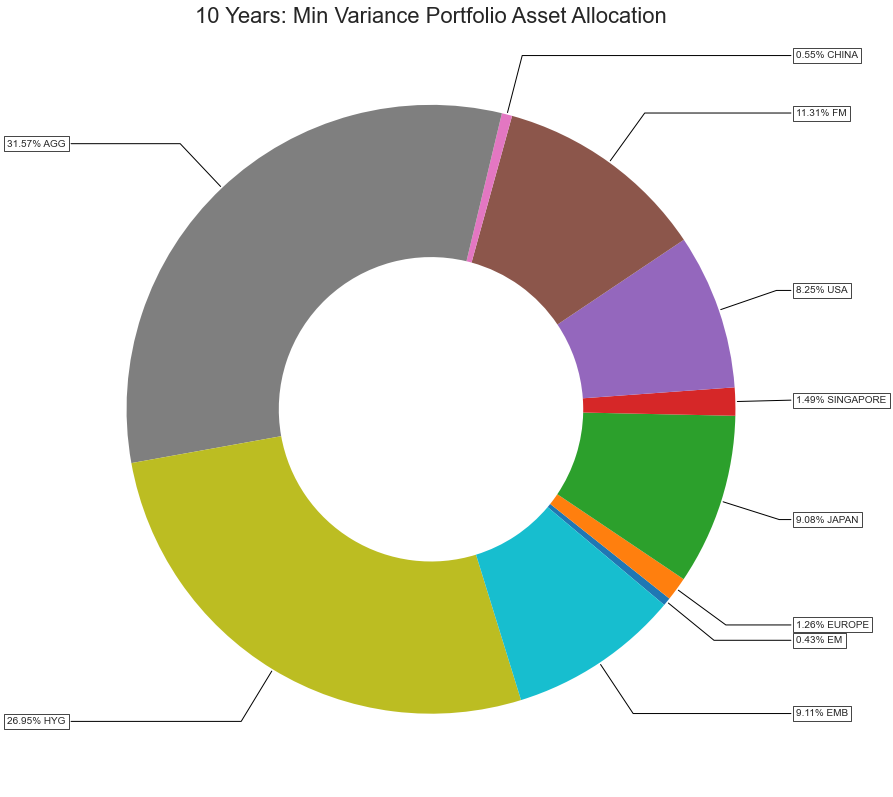

In [23]:
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(aspect="equal"))

text = []

# squeeze to change from dataframe to series
data = min_variance_port[min_variance_port.columns[3:]].to_numpy().squeeze()
data = np.round(data*100, 2)

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(str(data[i]) + "% "+ countries[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw, fontsize=10)

ax.set_title("10 Years: Min Variance Portfolio Asset Allocation", fontsize=22)

plt.show()

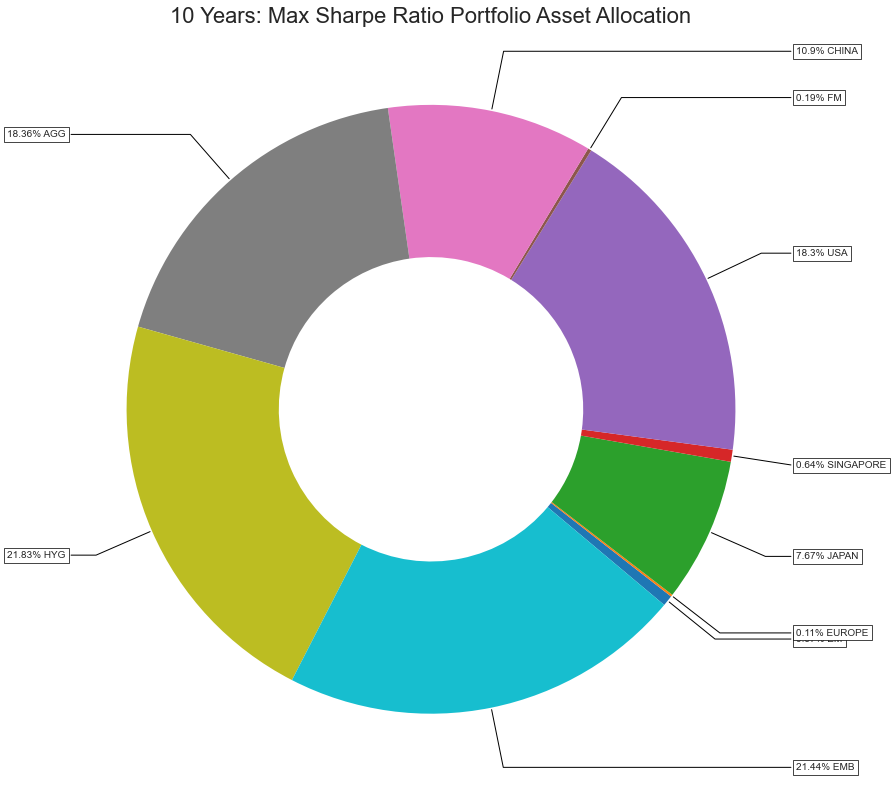

In [24]:
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(aspect="equal"))

text = []

# squeeze to change from dataframe to series
data = sharpe_portfolio[sharpe_portfolio.columns[3:]].to_numpy().squeeze()
data = np.round(data*100, 2)

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(str(data[i]) + "% "+ countries[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw, fontsize=10)

ax.set_title("10 Years: Max Sharpe Ratio Portfolio Asset Allocation", fontsize=22)

plt.show()

## 2016 Onwards

In [25]:
returns_monthly2 = returns_monthly.loc['2016':]

In [26]:
returns_monthly2

EM    EUROPE     JAPAN  SINGAPORE       USA        FM  \
Date                                                                      
2016-01-29 -0.042751 -0.066522 -0.082296  -0.090998 -0.054275 -0.068419   
2016-02-29  0.004707 -0.020839 -0.027755   0.032666 -0.004832  0.034600   
2016-03-31  0.133922  0.059242  0.038756   0.116576  0.066622  0.011278   
2016-04-29  0.005948  0.018573  0.046412  -0.003657  0.003786  0.026853   
2016-05-31 -0.047947 -0.013566 -0.010240  -0.049725  0.015743  0.003340   
...              ...       ...       ...        ...       ...       ...   
2020-09-30 -0.009709 -0.033911  0.002544  -0.030904 -0.038505  0.006383   
2020-10-30 -0.003866 -0.057265 -0.016126  -0.029209 -0.027039  0.009235   
2020-11-30  0.141261  0.168809  0.124698   0.184661  0.113864  0.040243   
2020-12-31  0.101595  0.046251  0.040183   0.026655  0.039798  0.056139   
2021-01-29  0.002060 -0.014900 -0.010057   0.008973 -0.010256  0.002944   

               CHINA       AGG       HYG       EMB  
Date                                                
2016-01-29 -0.127207  0.006767  0.009963  0.013513  
2016-02-29 -0.025362  0.008825  0.025161  0.032995  
2016-03-31  0.118987  0.002554  0.031840  0.015757  
2016-04-29 -0.002069  0.000290  0.001785 -0.001943  
2016-05-31 -0.009977  0.019229  0.017673  0.041399  
...              ...       ...       ...       ...  
2020-09-30 -0.028585 -0.005646  0.003787 -0.004928  
2020-10-30  0.052710  0.012141  0.033487  0.041886  
2020-11-30  0.027573 -0.000305  0.015700  0.018194  
2020-12-31  0.027496 -0.004661  0.004323 -0.010971  
2021-01-29  0.073621 -0.005115  0.006324  0.003250  

[61 rows x 10 columns]

In [27]:
returns_annual  = returns_monthly2.mean() * 12
cov_annual = returns_monthly2.cov() * 12

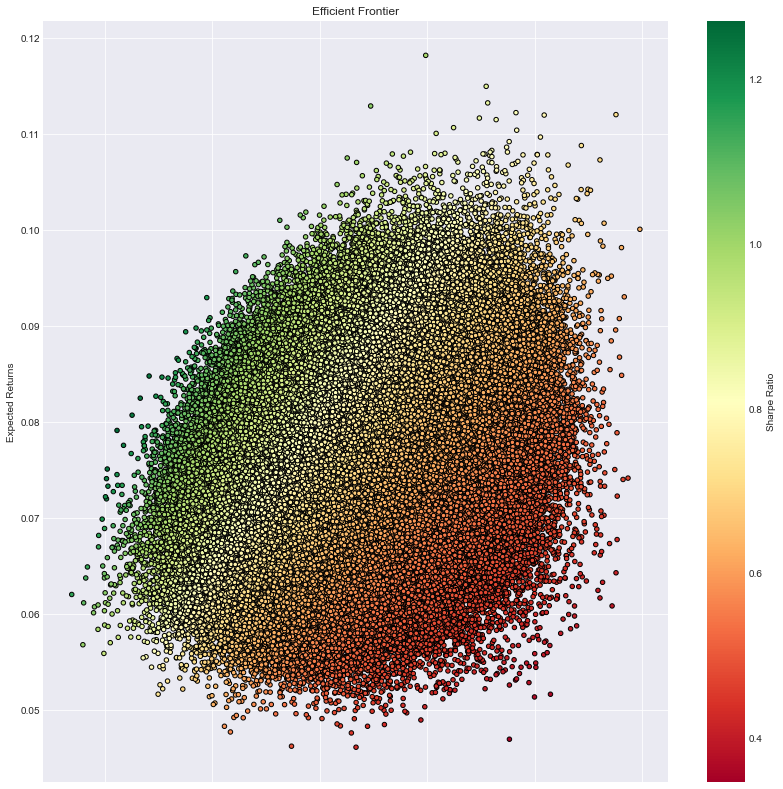

In [28]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(countries)
num_portfolios = 500000

#set random seed for reproduction's sake
np.random.seed(42)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(countries):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in countries]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(14, 14), grid=True)
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

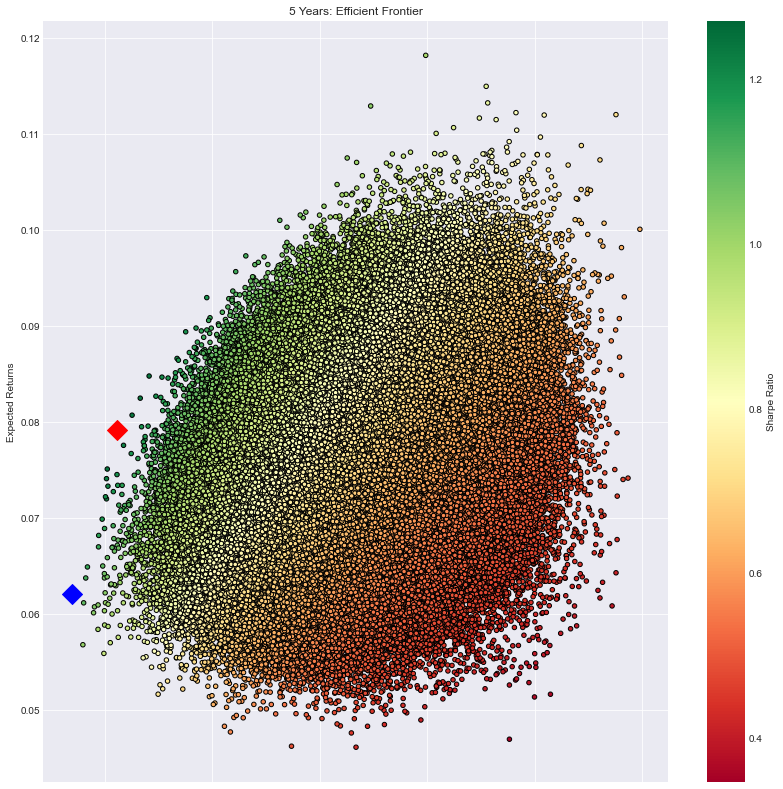

In [29]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(14, 14), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('5 Years: Efficient Frontier')
plt.show()

In [30]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)

                    247408
Returns           0.062023
Volatility        0.053817
Sharpe Ratio      1.152466
EM Weight         0.004278
EUROPE Weight     0.012610
JAPAN Weight      0.090754
SINGAPORE Weight  0.014862
USA Weight        0.082514
FM Weight         0.113109
CHINA Weight      0.005474
AGG Weight        0.315709
HYG Weight        0.269547
EMB Weight        0.091144
                    286989
Returns           0.079115
Volatility        0.062245
Sharpe Ratio      1.271020
EM Weight         0.006661
EUROPE Weight     0.004469
JAPAN Weight      0.022407
SINGAPORE Weight  0.012371
USA Weight        0.004819
FM Weight         0.033492
CHINA Weight      0.233263
AGG Weight        0.289604
HYG Weight        0.248303
EMB Weight        0.144612


In [31]:
df

Returns  Volatility  Sharpe Ratio  EM Weight  EUROPE Weight  \
0       0.060978    0.092859      0.656674   0.072008       0.182782   
1       0.066578    0.099871      0.666635   0.005208       0.245380   
2       0.072624    0.105849      0.686114   0.152815       0.034840   
3       0.078590    0.118664      0.662290   0.119297       0.033484   
4       0.062247    0.108104      0.575812   0.030166       0.122400   
...          ...         ...           ...        ...            ...   
499995  0.078170    0.087903      0.889275   0.045864       0.048890   
499996  0.074618    0.104332      0.715193   0.003880       0.103999   
499997  0.077044    0.107959      0.713643   0.085457       0.111757   
499998  0.076991    0.130254      0.591079   0.146326       0.157906   
499999  0.070768    0.109576      0.645834   0.097615       0.146878   

        JAPAN Weight  SINGAPORE Weight  USA Weight  FM Weight  CHINA Weight  \
0           0.140731          0.115096    0.029996   0.029991      0.011167   
1           0.210602          0.053720    0.046000   0.046400      0.076971   
2           0.072966          0.091502    0.113907   0.196104      0.049870   
3           0.012773          0.186322    0.189611   0.158736      0.059814   
4           0.008500          0.224769    0.063966   0.163765      0.077050   
...              ...               ...         ...        ...           ...   
499995      0.034339          0.068852    0.248125   0.113951      0.025353   
499996      0.121394          0.120593    0.093564   0.127789      0.136230   
499997      0.135526          0.066997    0.171126   0.101018      0.058709   
499998      0.114256          0.177524    0.071850   0.015043      0.150161   
499999      0.113818          0.103914    0.112448   0.104633      0.061337   

        AGG Weight  HYG Weight  EMB Weight  
0         0.166529    0.115569    0.136132  
1         0.132760    0.109279    0.073679  
2         0.128434    0.147960    0.011601  
3         0.019179    0.134355    0.086428  
4         0.128552    0.135138    0.045693  
...            ...         ...         ...  
499995    0.153903    0.202610    0.058111  
499996    0.069088    0.099053    0.124410  
499997    0.100447    0.021551    0.147413  
499998    0.149844    0.004130    0.012960  
499999    0.153478    0.095978    0.009900  

[500000 rows x 13 columns]

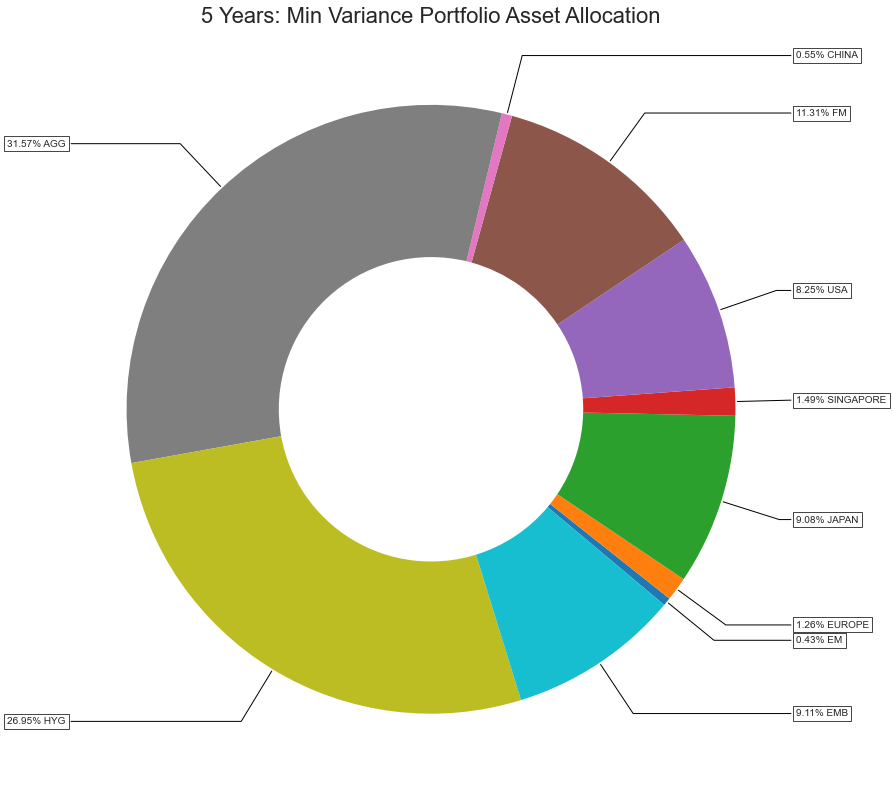

In [32]:
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(aspect="equal"))

text = []

# squeeze to change from dataframe to series
data = min_variance_port[min_variance_port.columns[3:]].to_numpy().squeeze()
data = np.round(data*100, 2)

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(str(data[i]) + "% "+ countries[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw, fontsize=10)

ax.set_title("5 Years: Min Variance Portfolio Asset Allocation", fontsize=22)

plt.show()

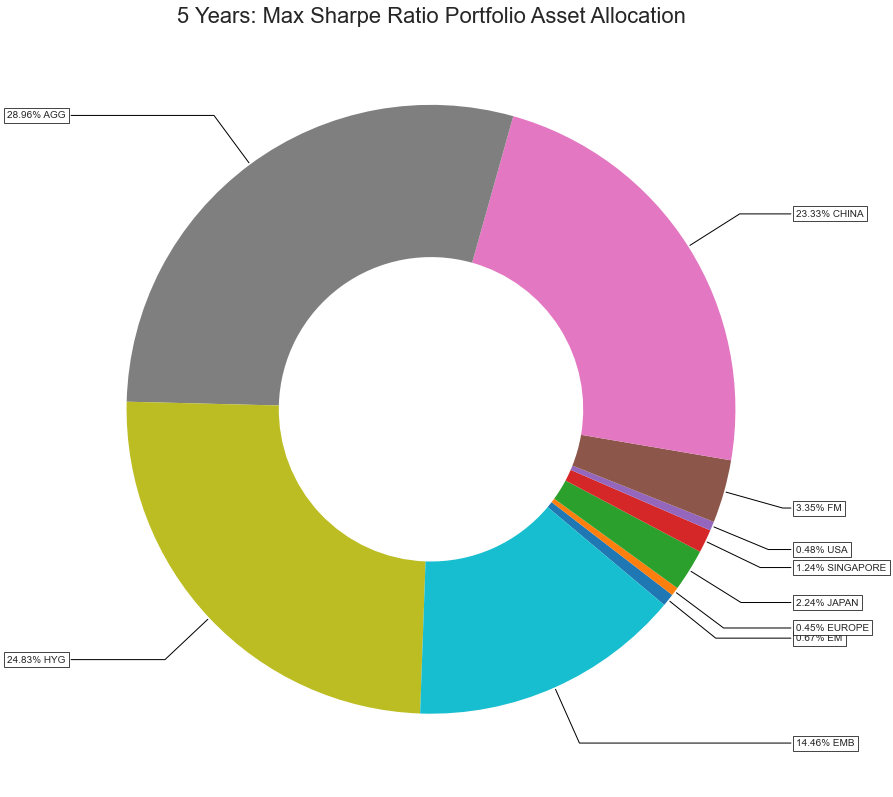

In [33]:
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(aspect="equal"))

text = []

# squeeze to change from dataframe to series
data = sharpe_portfolio[sharpe_portfolio.columns[3:]].to_numpy().squeeze()
data = np.round(data*100, 2)

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(str(data[i]) + "% "+ countries[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw, fontsize=10)

ax.set_title("5 Years: Max Sharpe Ratio Portfolio Asset Allocation", fontsize=22)

plt.show()

## Studying Own Suggested Portfolio

In [34]:
our_weights = np.array([0.15, 0.03, 0.02, 0.05, 0.35, 0.0, 0.1, 0.1, 0.1, 0.1])
np.sum(our_weights)

1.0

In [35]:
returns = np.dot(our_weights, returns_annual)
volatility = np.sqrt(np.dot(our_weights.T, np.dot(cov_annual, our_weights)))
sharpe = returns / volatility

In [36]:
print('Returns: ', returns)
print('Volatility: ', volatility)
print('Sharpe Ratio: ', sharpe)

Returns:  0.10017098447021566
Volatility:  0.1100082891158649
Sharpe Ratio:  0.9105766963134186


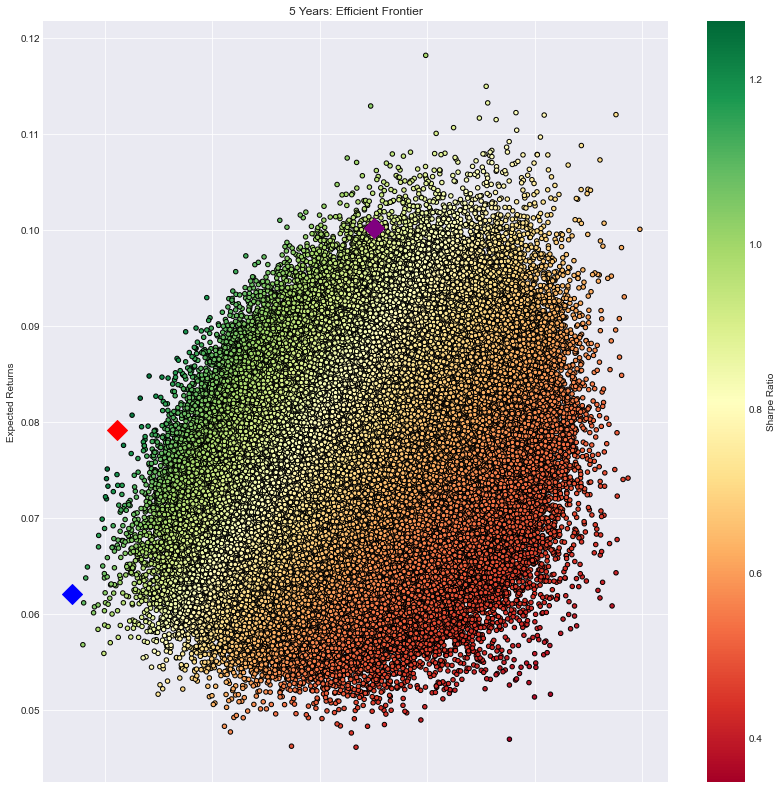

In [37]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(14, 14), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.scatter(x=volatility, y=returns, c='purple', marker='D', s=200 )
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('5 Years: Efficient Frontier')
plt.show()

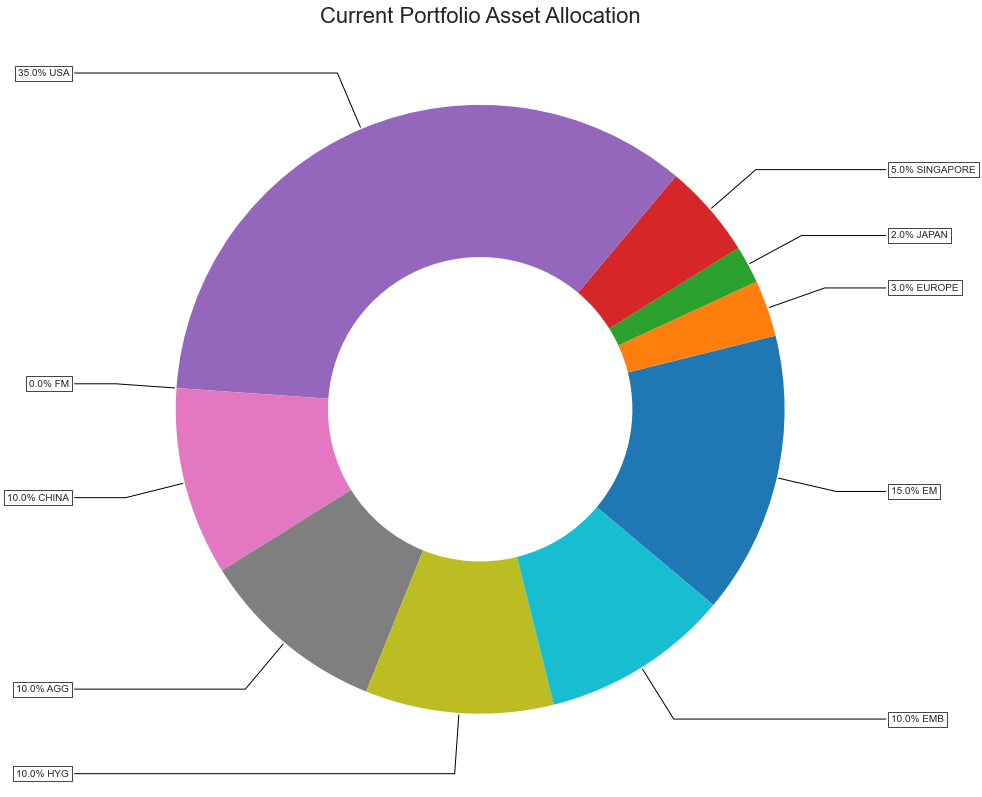

In [38]:
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(aspect="equal"))

text = []

data = our_weights*100

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(str(data[i]) + "% "+ countries[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw, fontsize=10)

ax.set_title("Current Portfolio Asset Allocation", fontsize=22)

plt.show()